# Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск <a class='anchor' id='reg'>

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

# Зададим размер графиков
plt.rcParams['figure.figsize'] = [10, 5]

### Задание 1 <a class='anchor' id='reg1'>

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
n_features = 2
# Сгенерируем датасет
data, target, coef = datasets.make_regression(n_samples=1000, n_features=n_features, n_informative=2, n_targets=1, 
                                              noise=5, coef=True, random_state=2)

In [3]:
# Получим средние значения и стандартное отклонение по столбцам
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
def mse(X, w, y_pred):
    """ Вычисляет среднеквадратическую ошибку """
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [5]:
def plot_errors(errors, title='MSE'):
    """ Отображает график MSE в зависимости от числа итераций """
    plt.plot(range(len(errors[-100:])), errors[-100:])
    plt.title(title)
    plt.xlabel('Количество итераций')
    plt.ylabel('MSE')
    plt.grid()
    plt.show() 

In [6]:
def print_errors(errors, stop_idx=100):
    """ Выводит значение MSE на первой и итерации с номером stop_idx """
    print(f'Iteration 0, MSE = {errors[0]}\nIteration {stop_idx}, MSE = {errors[stop_idx]}')

In [7]:
# Веса
w = np.zeros(n_features)

# Список векторов весов после каждой итерации
w_list = [w.copy()]

# Список значений ошибок после каждой итерации
errors1 = []

# Шаг градиентного спуска
eta = 0.01

# Максимальное число итераций
max_iter = 1e4

# Критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# Зададим начальную разницу весов большим числом
weight_dist = np.inf

# Счетчик итераций
iter_num = 0

X = data
Y = target

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors1.append(mse(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors1[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 38.5683


In [8]:
%%time
# Инициализируем начальный вектор весов
w = np.zeros(n_features)

# Список векторов весов после каждой итерации
w_list = [w.copy()]

# Список значений ошибок после каждой итерации
errors = []

# Шаг градиентного спуска
eta = 0.01

# Максимальное число итераций
max_iter = 1e5

# Критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# Зададим начальную разницу весов большим числом
weight_dist = np.inf

# Счётчик итераций
iter_num = 0

# Фиксируем случайность выборки
np.random.seed(1234)

# Ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # Генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, 
                                 (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mse(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 248.3494
Wall time: 7.05 s


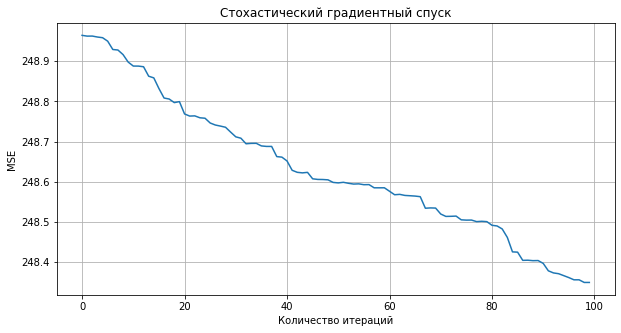

In [9]:
# Стохастический градиентный спуск
plot_errors(errors, 'Стохастический градиентный спуск')

In [10]:
print_errors(errors)

Iteration 0, MSE = 8190.666400278678
Iteration 100, MSE = 8154.069284417697


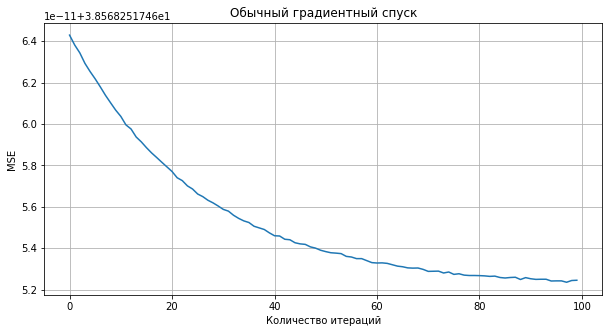

In [11]:
# Обычный градиентный спуск
plot_errors(errors1, 'Обычный градиентный спуск')

In [12]:
print_errors(errors1)

Iteration 0, MSE = 7875.575487546506
Iteration 100, MSE = 190.6192338062269


Из второго графика видно, что обычный градиентый спуск сходится быстрее, чем стохастический. Значения MSE для стохастического градиентного спуска изменяются более плавно, разница ошибки между 1 и 100 итерацией меньше, чем для обычного.